## Keras DNN 실습과제 답안 - 03
### Multi-Classification , 'iris.csv'

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
tf.random.set_seed(5)
np.random.seed(5)

In [2]:
species_list =['"setosa"','"versicolor"','"virginica"']

xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)
xy.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5288\3749378865.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)


(150, 6)

In [3]:
x_train = np.float32(xy[:35,1:-1])
x_train = np.append(x_train , np.float32(xy[50:85,1:-1]),0)
x_train = np.append(x_train , np.float32(xy[100:135,1:-1]),0) # [105,4]

y_train = xy[:35,[-1] ]
y_train = np.append(y_train, xy[50:85,[-1]],0)
y_train = np.append(y_train, xy[100:135,[-1]],0) # [105,1]

for i in range(105):
    y_train[i,-1] = np.int32(species_list.index(y_train[i,-1]))
print(x_train.shape,y_train.shape)

(105, 4) (105, 1)


In [4]:
x_test = np.float32(xy[35:50,1:-1])
x_test = np.append(x_test , np.float32(xy[85:100,1:-1]),0)
x_test = np.append(x_test , np.float32(xy[135:,1:-1]),0) # [45,4]

y_test = xy[35:50,[-1] ]
y_test = np.append(y_test, xy[85:100,[-1]],0)
y_test = np.append(y_test, xy[135:,[-1]],0) # [45,1]

for i in range(45):
    y_test[i,-1] = np.int32(species_list.index(y_test[i,-1]))

print(x_test.shape, y_test.shape)

(45, 4) (45, 1)


In [5]:
# one-hot 인코딩
nb_classes = 3

# y_train = np.array(y_train,dtype=np.int32)   # Keras에서는 정수로 변환 불필요
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)

# y_test = np.array(y_test,dtype=np.int32)     # Keras에서는 정수로 변환 불필요
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

In [6]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, input_shape=[4,],activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 학습
history = model.fit(x_train, y_train, epochs=700)

Epoch 1/700
4/4 [==============================] - 1s 2ms/step - loss: 1.2190 - accuracy: 0.3333
Epoch 2/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1717 - accuracy: 0.3333
Epoch 3/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1330 - accuracy: 0.3619
Epoch 4/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0998 - accuracy: 0.4571
Epoch 5/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0720 - accuracy: 0.4571
Epoch 6/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0462 - accuracy: 0.5048
Epoch 7/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0210 - accuracy: 0.5048
Epoch 8/700
4/4 [==============================] - 0s 997us/step - loss: 1.0018 - accuracy: 0.4476
Epoch 9/700
4/4 [==============================] - 0s 1ms/step - loss: 0.9830 - accuracy: 0.5524
Epoch 10/700
4/4 [==============================] - 0s 1ms/step - loss: 0.9672 - accuracy: 0.6571
Epoch 11/700
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.9524
Epoch 85/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.9524
Epoch 86/700
4/4 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.9619
Epoch 87/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.9524
Epoch 88/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.9619
Epoch 89/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.9429
Epoch 90/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.9048
Epoch 91/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8857
Epoch 92/700
4/4 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.9143
Epoch 93/700
4/4 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.9333
Epoch 94/700
4/4 [===============

4/4 [==============================] - 0s 997us/step - loss: 0.2771 - accuracy: 0.9714
Epoch 167/700
4/4 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9714
Epoch 168/700
4/4 [==============================] - 0s 997us/step - loss: 0.2746 - accuracy: 0.9714
Epoch 169/700
4/4 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.9714
Epoch 170/700
4/4 [==============================] - 0s 997us/step - loss: 0.2722 - accuracy: 0.9810
Epoch 171/700
4/4 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9810
Epoch 172/700
4/4 [==============================] - 0s 997us/step - loss: 0.2698 - accuracy: 0.9810
Epoch 173/700
4/4 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9810
Epoch 174/700
4/4 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9810
Epoch 175/700
4/4 [==============================] - 0s 997us/step - loss: 0.2671 - accuracy: 0.9714
Epoch 176/700


4/4 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9714
Epoch 249/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9810
Epoch 250/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9714
Epoch 251/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9714
Epoch 252/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9714
Epoch 253/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9714
Epoch 254/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9714
Epoch 255/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9714
Epoch 256/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9714
Epoch 257/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9714
Epoch 258/700
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9714
Epoch 331/700
4/4 [==============================] - 0s 997us/step - loss: 0.1561 - accuracy: 0.9714
Epoch 332/700
4/4 [==============================] - 0s 997us/step - loss: 0.1550 - accuracy: 0.9714
Epoch 333/700
4/4 [==============================] - 0s 997us/step - loss: 0.1542 - accuracy: 0.9714
Epoch 334/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9619
Epoch 335/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9619
Epoch 336/700
4/4 [==============================] - 0s 836us/step - loss: 0.1542 - accuracy: 0.9619
Epoch 337/700
4/4 [==============================] - 0s 997us/step - loss: 0.1531 - accuracy: 0.9714
Epoch 338/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9714
Epoch 339/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9714
Epoch 340/700


4/4 [==============================] - 0s 859us/step - loss: 0.1288 - accuracy: 0.9714
Epoch 413/700
4/4 [==============================] - 0s 997us/step - loss: 0.1288 - accuracy: 0.9714
Epoch 414/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9714
Epoch 415/700
4/4 [==============================] - 0s 997us/step - loss: 0.1293 - accuracy: 0.9619
Epoch 416/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9714
Epoch 417/700
4/4 [==============================] - 0s 837us/step - loss: 0.1282 - accuracy: 0.9714
Epoch 418/700
4/4 [==============================] - 0s 997us/step - loss: 0.1276 - accuracy: 0.9714
Epoch 419/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9714
Epoch 420/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9619
Epoch 421/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9714
Epoch 422/700


4/4 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9714
Epoch 495/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9714
Epoch 496/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.9619
Epoch 497/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9714
Epoch 498/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9714
Epoch 499/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9714
Epoch 500/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9714
Epoch 501/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9714
Epoch 502/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9714
Epoch 503/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9714
Epoch 504/700
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.1019 - accuracy: 0.9714
Epoch 577/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9714
Epoch 578/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9714
Epoch 579/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9619
Epoch 580/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9619
Epoch 581/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9619
Epoch 582/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9619
Epoch 583/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9714
Epoch 584/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9714
Epoch 585/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9619
Epoch 586/700
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9714
Epoch 659/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9714
Epoch 660/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9714
Epoch 661/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9714
Epoch 662/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9714
Epoch 663/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.9714
Epoch 664/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9714
Epoch 665/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9714
Epoch 666/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9714
Epoch 667/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9714
Epoch 668/700
4/4 [=====

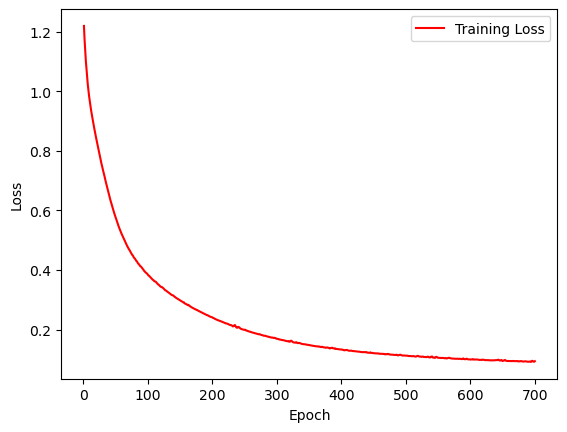

In [8]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
# 평가

accuracy = model.evaluate(x_test, y_test)

print('Accuracy',accuracy[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 1.0000
Accuracy 1.0


## 모델 개선 : 3 layers

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(5)
np.random.seed(5)

In [11]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=40, input_shape=[4,],activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                200       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습
history = model.fit(x_train, y_train, epochs=700)

Epoch 1/700
4/4 [==============================] - 0s 4ms/step - loss: 1.2032 - accuracy: 0.3333
Epoch 2/700
4/4 [==============================] - 0s 6ms/step - loss: 1.0508 - accuracy: 0.3905
Epoch 3/700
4/4 [==============================] - 0s 3ms/step - loss: 0.9364 - accuracy: 0.6667
Epoch 4/700
4/4 [==============================] - 0s 6ms/step - loss: 0.8651 - accuracy: 0.6762
Epoch 5/700
4/4 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6667
Epoch 6/700
4/4 [==============================] - 0s 10ms/step - loss: 0.7946 - accuracy: 0.6667
Epoch 7/700
4/4 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.6667
Epoch 8/700
4/4 [==============================] - 0s 4ms/step - loss: 0.7351 - accuracy: 0.6667
Epoch 9/700
4/4 [==============================] - 0s 5ms/step - loss: 0.7077 - accuracy: 0.6667
Epoch 10/700
4/4 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6667
Epoch 11/700
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9619
Epoch 85/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9619
Epoch 86/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.9429
Epoch 87/700
4/4 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9524
Epoch 88/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9619
Epoch 89/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9619
Epoch 90/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9714
Epoch 91/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9524
Epoch 92/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9333
Epoch 93/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9238
Epoch 94/700
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9714
Epoch 168/700
4/4 [==============================] - 0s 4ms/step - loss: 0.1046 - accuracy: 0.9619
Epoch 169/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9429
Epoch 170/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9524
Epoch 171/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9619
Epoch 172/700
4/4 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9714
Epoch 173/700
4/4 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9714
Epoch 174/700
4/4 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9714
Epoch 175/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9429
Epoch 176/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9524
Epoch 177/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9714
Epoch 250/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9810
Epoch 251/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9429
Epoch 252/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9429
Epoch 253/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9810
Epoch 254/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9714
Epoch 255/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9714
Epoch 256/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9810
Epoch 257/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9714
Epoch 258/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9619
Epoch 259/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9810
Epoch 332/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9524
Epoch 333/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9524
Epoch 334/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9714
Epoch 335/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9810
Epoch 336/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9810
Epoch 337/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.9810
Epoch 338/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9714
Epoch 339/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9524
Epoch 340/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9619
Epoch 341/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9810
Epoch 414/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9714
Epoch 415/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9810
Epoch 416/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9714
Epoch 417/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9810
Epoch 418/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9810
Epoch 419/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9714
Epoch 420/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9810
Epoch 421/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9810
Epoch 422/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9810
Epoch 423/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9810
Epoch 496/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.9810
Epoch 497/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9810
Epoch 498/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9810
Epoch 499/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0741 - accuracy: 0.9810
Epoch 500/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9810
Epoch 501/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 502/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 503/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9810
Epoch 504/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 505/700
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.0714 - accuracy: 0.9810
Epoch 578/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9810
Epoch 579/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9714
Epoch 580/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9714
Epoch 581/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9810
Epoch 582/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9714
Epoch 583/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9905
Epoch 584/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9810
Epoch 585/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 586/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9810
Epoch 587/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9714
Epoch 660/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9714
Epoch 661/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9810
Epoch 662/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9714
Epoch 663/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9810
Epoch 664/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9810
Epoch 665/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9810
Epoch 666/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9810
Epoch 667/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9619
Epoch 668/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9714
Epoch 669/700
4/4 [=====

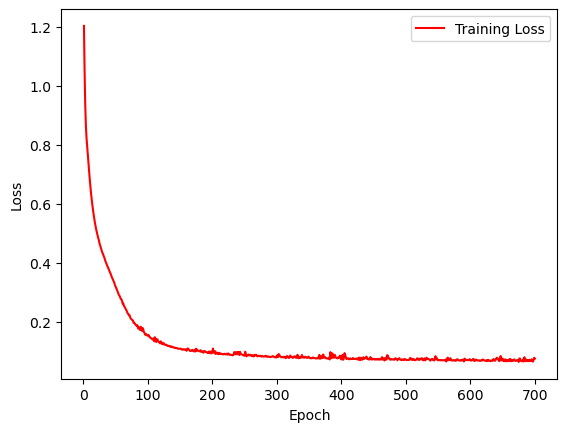

In [13]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
# 평가
accuracy = model.evaluate(x_test, y_test)

print('Accuracy',accuracy[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 1.0000
Accuracy 1.0


### 원핫 인코딩 하지 않고 모델 구현 : 'sparse_categorical_crossentropy'

In [72]:
tf.keras.backend.clear_session()
tf.random.set_seed(5)
np.random.seed(5)

In [73]:
# species_list =['"setosa"','"versicolor"','"virginica"']
# xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)

x_train = np.float32(xy[:35,1:-1])
x_train = np.append(x_train , np.float32(xy[50:85,1:-1]),0)
x_train = np.append(x_train , np.float32(xy[100:135,1:-1]),0) # [105,4]

y_train = xy[:35,[-1] ]
y_train = np.append(y_train, xy[50:85,[-1]],0)
y_train = np.append(y_train, xy[100:135,[-1]],0) # [105,1]

for i in range(105):
    y_train[i,-1] = np.int32(species_list.index(y_train[i,-1]))

y_train = y_train.astype(np.int32)

print(x_train.shape,y_train.shape)

(105, 4) (105, 1)


In [74]:
x_test = np.float32(xy[35:50,1:-1])
x_test = np.append(x_test , np.float32(xy[85:100,1:-1]),0)
x_test = np.append(x_test , np.float32(xy[135:,1:-1]),0) # [45,4]

y_test = xy[35:50,[-1] ]
y_test = np.append(y_test, xy[85:100,[-1]],0)
y_test = np.append(y_test, xy[135:,[-1]],0) # [45,1]

for i in range(45):
    y_test[i,-1] = np.int32(species_list.index(y_test[i,-1]))

y_test = y_test.astype(np.int32)

print(x_test.shape, y_test.shape)

(45, 4) (45, 1)


In [75]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=40, input_shape=[4,],activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                200       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [76]:
# 학습
history = model.fit(x_train, y_train, epochs=700)

Epoch 1/700
4/4 [==============================] - 0s 4ms/step - loss: 1.5999 - accuracy: 0.3333
Epoch 2/700
4/4 [==============================] - 0s 3ms/step - loss: 1.4402 - accuracy: 0.3333
Epoch 3/700
4/4 [==============================] - 0s 3ms/step - loss: 1.3131 - accuracy: 0.3333
Epoch 4/700
4/4 [==============================] - 0s 4ms/step - loss: 1.2014 - accuracy: 0.3333
Epoch 5/700
4/4 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.2952
Epoch 6/700
4/4 [==============================] - 0s 4ms/step - loss: 1.0022 - accuracy: 0.3333
Epoch 7/700
4/4 [==============================] - 0s 3ms/step - loss: 0.9145 - accuracy: 0.5810
Epoch 8/700
4/4 [==============================] - 0s 3ms/step - loss: 0.8536 - accuracy: 0.8190
Epoch 9/700
4/4 [==============================] - 0s 4ms/step - loss: 0.7985 - accuracy: 0.8762
Epoch 10/700
4/4 [==============================] - 0s 4ms/step - loss: 0.7485 - accuracy: 0.9048
Epoch 11/700
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9714
Epoch 85/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9714
Epoch 86/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1543 - accuracy: 0.9619
Epoch 87/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9619
Epoch 88/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9619
Epoch 89/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9524
Epoch 90/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9619
Epoch 91/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9714
Epoch 92/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9238
Epoch 93/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9238
Epoch 94/700
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9714
Epoch 168/700
4/4 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9714
Epoch 169/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9429
Epoch 170/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9714
Epoch 171/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9810
Epoch 172/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9714
Epoch 173/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9619
Epoch 174/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9714
Epoch 175/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9524
Epoch 176/700
4/4 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9524
Epoch 177/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9714
Epoch 250/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9714
Epoch 251/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9619
Epoch 252/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9429
Epoch 253/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9810
Epoch 254/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9714
Epoch 255/700
4/4 [==============================] - 0s 5ms/step - loss: 0.0875 - accuracy: 0.9714
Epoch 256/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9714
Epoch 257/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9810
Epoch 258/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9714
Epoch 259/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9810
Epoch 332/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9619
Epoch 333/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9714
Epoch 334/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9714
Epoch 335/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9714
Epoch 336/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9714
Epoch 337/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9714
Epoch 338/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9810
Epoch 339/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9524
Epoch 340/700
4/4 [==============================] - 0s 5ms/step - loss: 0.0792 - accuracy: 0.9810
Epoch 341/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9810
Epoch 414/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9714
Epoch 415/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9810
Epoch 416/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9810
Epoch 417/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9714
Epoch 418/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9714
Epoch 419/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9714
Epoch 420/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9810
Epoch 421/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9810
Epoch 422/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.9714
Epoch 423/700
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9810
Epoch 496/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9810
Epoch 497/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9905
Epoch 498/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9810
Epoch 499/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9810
Epoch 500/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9810
Epoch 501/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9810
Epoch 502/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9810
Epoch 503/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9905
Epoch 504/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0710 - accuracy: 0.9905
Epoch 505/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9810
Epoch 578/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9810
Epoch 579/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9619
Epoch 580/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9714
Epoch 581/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9714
Epoch 582/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9810
Epoch 583/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9810
Epoch 584/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9810
Epoch 585/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9714
Epoch 586/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9810
Epoch 587/700
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9810
Epoch 660/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9714
Epoch 661/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9905
Epoch 662/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9810
Epoch 663/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9810
Epoch 664/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9810
Epoch 665/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9810
Epoch 666/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9810
Epoch 667/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9714
Epoch 668/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9714
Epoch 669/700
4/4 [=====

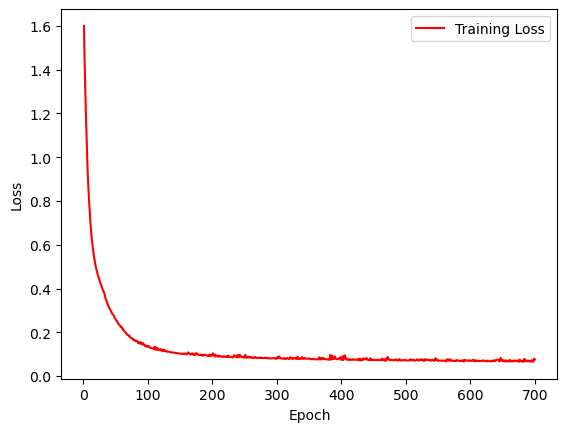

In [77]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [78]:
# 평가
accuracy = model.evaluate(x_test, y_test)

print('Accuracy',accuracy[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 1.0000
Accuracy 1.0
